In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

df_normalizado = pd.read_excel('../data/processed/base_anuario_de_siniestralidad_clean.xlsx')
excel_path = '../data/processed/base_anuario_de_siniestralidad_clean.xlsx'

In [2]:
###
# 1. Ver todas las hojas
###
print('Hojas disponibles en el archivo:')
hojas = pd.ExcelFile(excel_path).sheet_names
for i, hoja in enumerate(hojas):
    print(f"   {i+1}. {hoja}")

Hojas disponibles en el archivo:
   1. Vehiculos
   2. Actor_Vial


In [ ]:
###
# 2. Crear un DataFrame único con el análisis de todas las hojas
###
resultados = []

for hoja in hojas:
    df = pd.read_excel(excel_path, sheet_name=hoja)
    
    for columna in df.columns:
        resultados.append({
            'Hoja': hoja,
            'Columna': columna,
            'Tipo_Dato': df[columna].dtype,
            'Nulos': df[columna].isnull().sum(),
            'Unicos': df[columna].nunique(),
            '%_Nulos': round((df[columna].isnull().sum() / len(df)) * 100, 2)
        })

      Hoja                        Columna Tipo_Dato  Nulos  Unicos  %_Nulos
 Vehiculos               Codigo_Accidente     int64      0  278466     0.00
 Vehiculos                          Clase    object   4023      22     0.77
 Vehiculos                       Servicio    object      0       5     0.00
 Vehiculos                      Modalidad    object 421229       8    80.52
 Vehiculos   Vehiculo_Viajaba_Clasificado    object      0       8     0.00
 Vehiculos                      Tipo_SITP    object 475607       8    90.91
Actor_Vial             Codigo_Accidentado     int64      0  608155     0.00
Actor_Vial               Codigo_Accidente     int64      0  278463     0.00
Actor_Vial                           Edad   float64  13337     120     2.19
Actor_Vial                           Sexo    object   5459       3     0.90
Actor_Vial Gravedad_Indicador_Tradicional    object   4435       3     0.73
Actor_Vial               Muerte_Posterior    object 325817       2    53.57
Actor_Vial  

In [ ]:
###
# 2. Crear un DataFrame único con el análisis de todas las hojas
###
df_analisis = pd.DataFrame(resultados)
print(df_analisis.to_string(index=False))

In [21]:
###
# 3. Resumen de los DataFrames de las Hojas
###
df_vehiculos = pd.read_excel(excel_path, sheet_name='Vehiculos')
df_actor_vial = pd.read_excel(excel_path, sheet_name='Actor_Vial')

print("=== Resumen de DataFrames de las Hojas ===")
print(f"Vehiculos: {df_vehiculos.shape} | Columnas: {list(df_vehiculos.columns)}")
print(f"Actor_vial: {df_actor_vial.shape} | Columnas: {list(df_actor_vial.columns)}")

=== Resumen de DataFrames de las Hojas ===
Vehiculos: (523168, 6) | Columnas: ['Codigo_Accidente', 'Clase', 'Servicio', 'Modalidad', 'Vehiculo_Viajaba_Clasificado', 'Tipo_SITP']
Actor_vial: (608155, 10) | Columnas: ['Codigo_Accidentado', 'Codigo_Accidente', 'Edad', 'Sexo', 'Gravedad_Indicador_Tradicional', 'Muerte_Posterior', 'Gravedad_Indicador_30d', 'Condicion', 'Condicion_Especifica', 'Validación']


In [35]:
###
# 4. Separación de datos categoricos y numericos (si existen)
###

columnas_vehiculos = list(df_vehiculos.keys())
cols_categoricos_vehiculos = [x for x in columnas_vehiculos if df_vehiculos[x].dtype == 'object']
cols_numericos_vehiculos = [x for x in columnas_vehiculos if df_vehiculos[x].dtype != 'object']

columnas_actor_vial = list(df_actor_vial.keys())
cols_categoricos_actor_vial = [x for x in columnas_actor_vial if df_actor_vial[x].dtype == 'object']
cols_numericos_actor_vial = [y for y in columnas_actor_vial if df_actor_vial[y].dtype != 'object']

print("=== Datos Categoícos y numéricos de Vehiculos y Actor_vial ===")
print('\n=== Vehiculos ===')
print(f"Categóricos: {cols_categoricos_vehiculos} | Numéricos: {list(cols_numericos_vehiculos)}")
print('\n=== Actor_vial ===')
print(f"Categóricos: {cols_categoricos_actor_vial} | Numéricos: {list(cols_numericos_actor_vial)}")

=== Datos Categoícos y numéricos de Vehiculos y Actor_vial ===

=== Vehiculos ===
Categóricos: ['Clase', 'Servicio', 'Modalidad', 'Vehiculo_Viajaba_Clasificado', 'Tipo_SITP'] | Numéricos: ['Codigo_Accidente']

=== Actor_vial ===
Categóricos: ['Sexo', 'Gravedad_Indicador_Tradicional', 'Muerte_Posterior', 'Gravedad_Indicador_30d', 'Condicion', 'Condicion_Especifica', 'Validación'] | Numéricos: ['Codigo_Accidentado', 'Codigo_Accidente', 'Edad']



=== Datos Categoícos de Vehiculos===


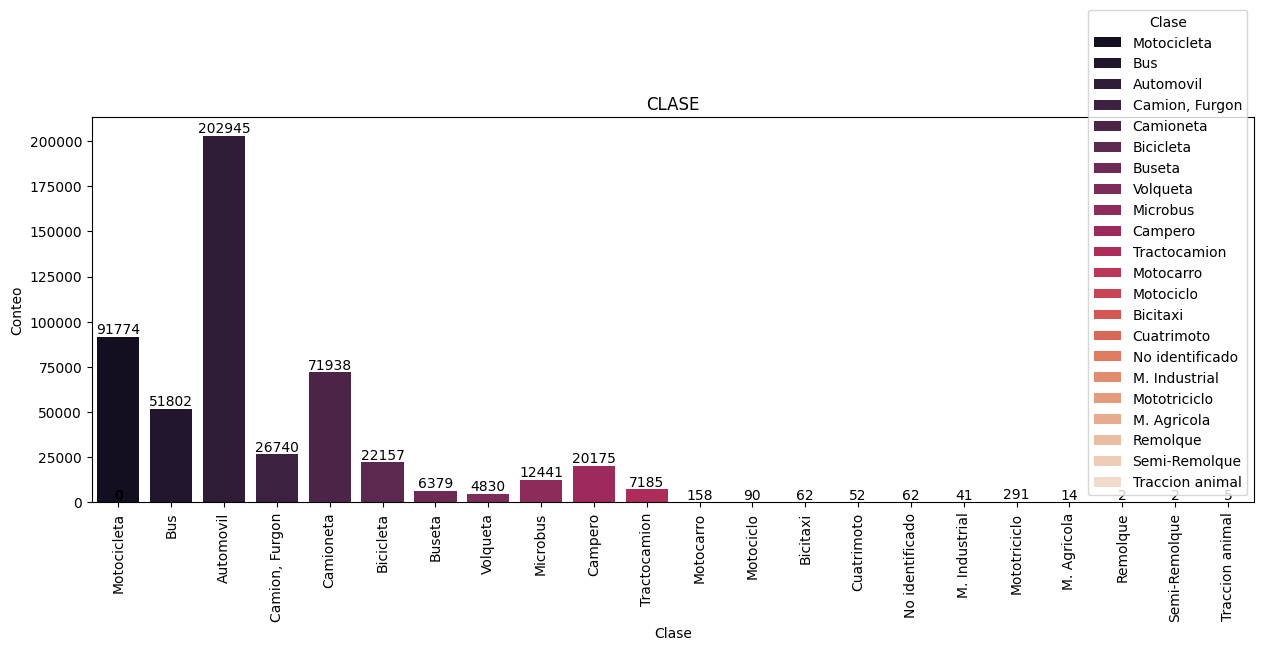

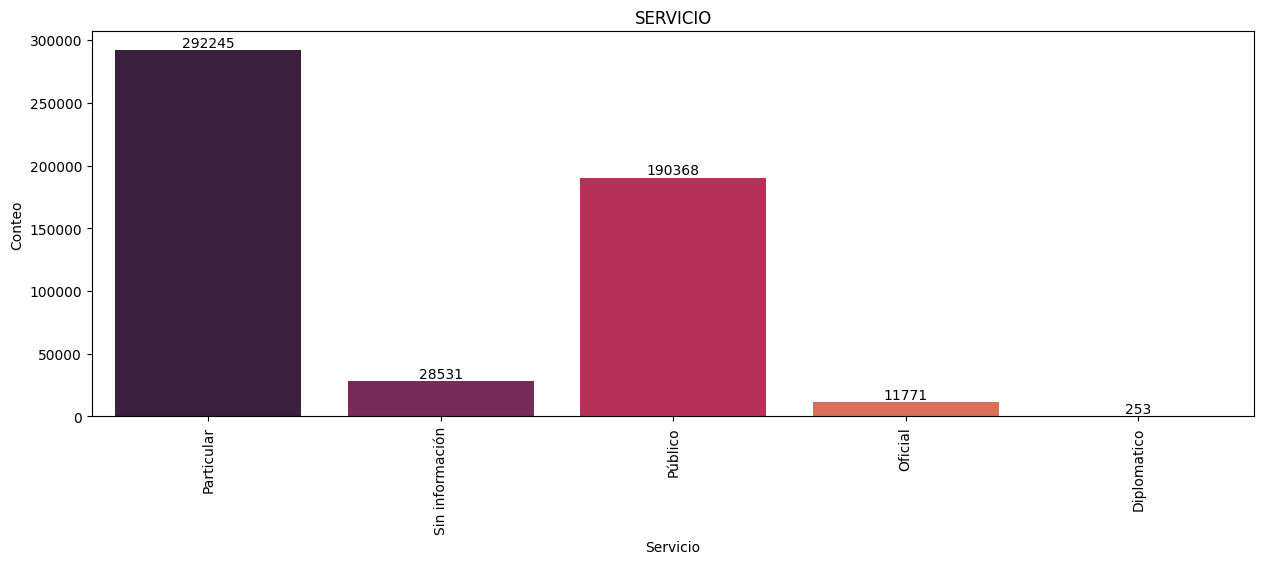

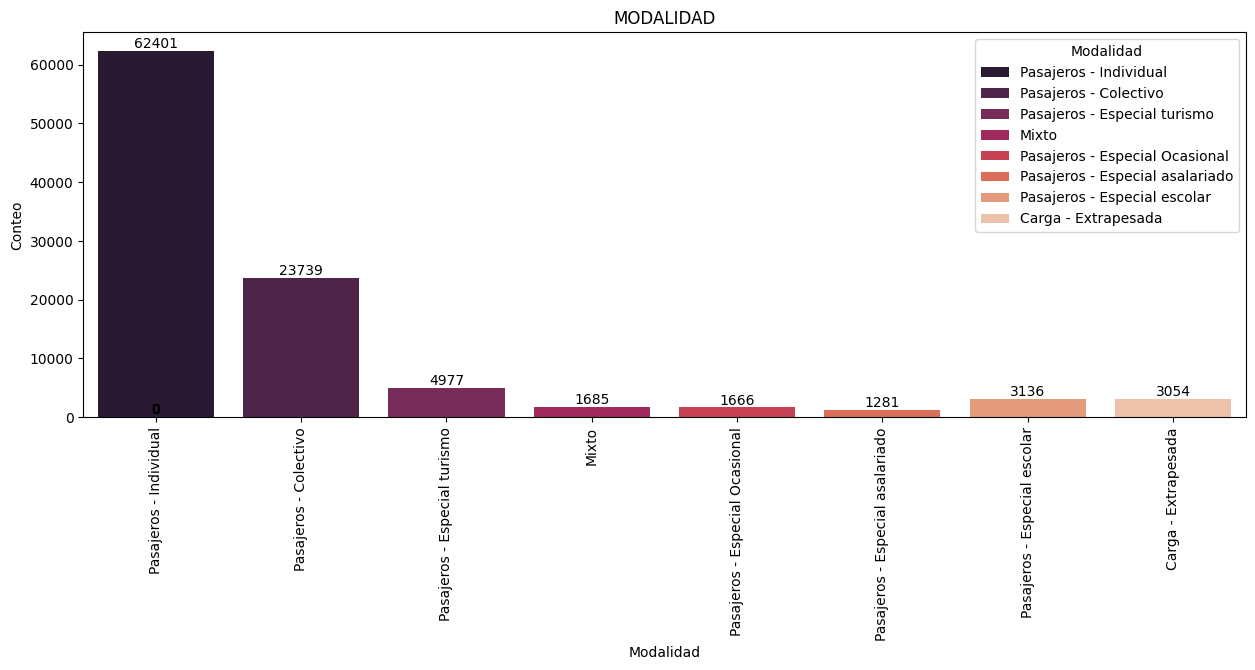

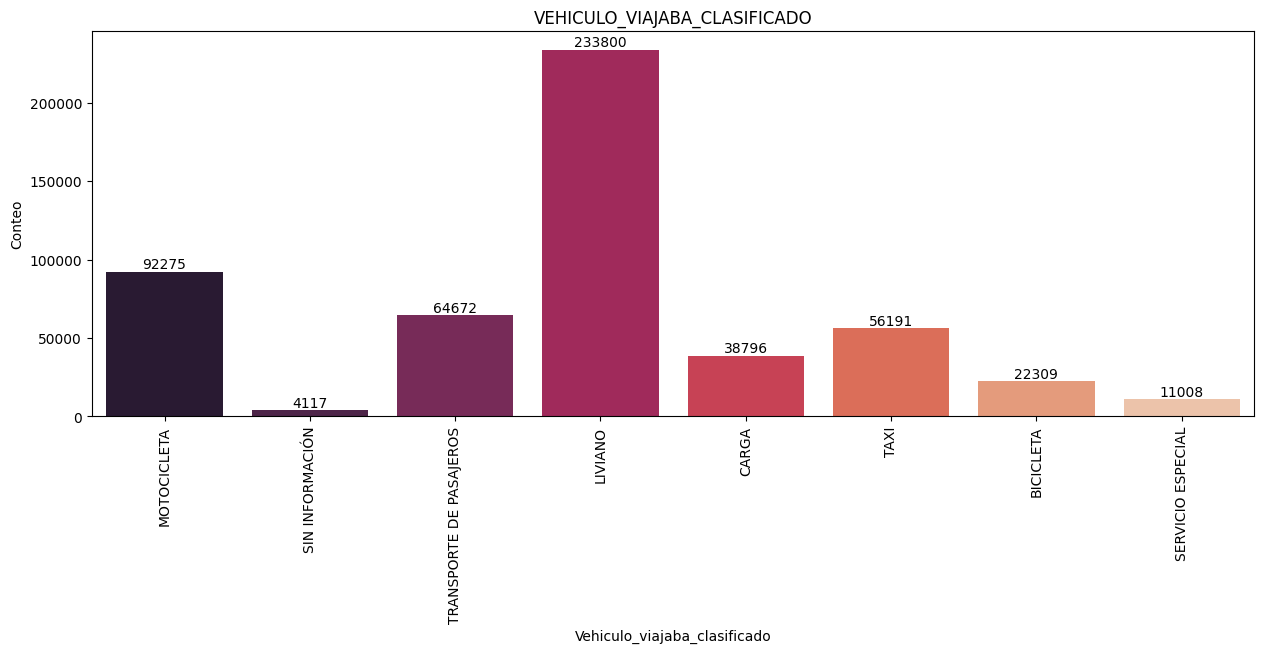

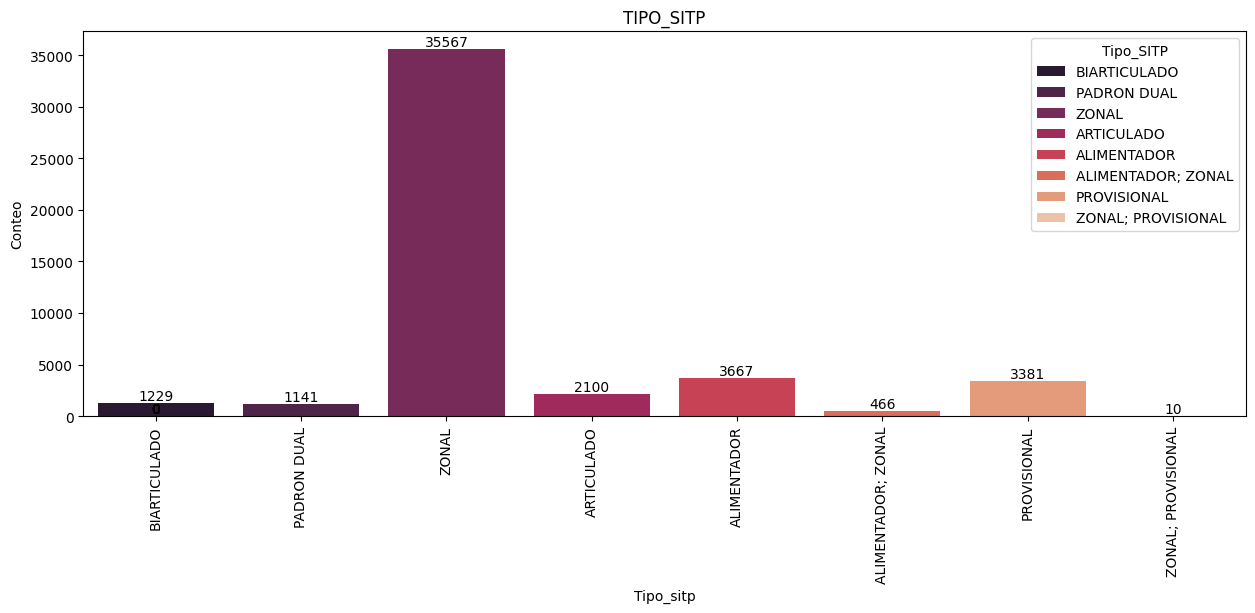


=== Datos Categoícos de Actor_vial===


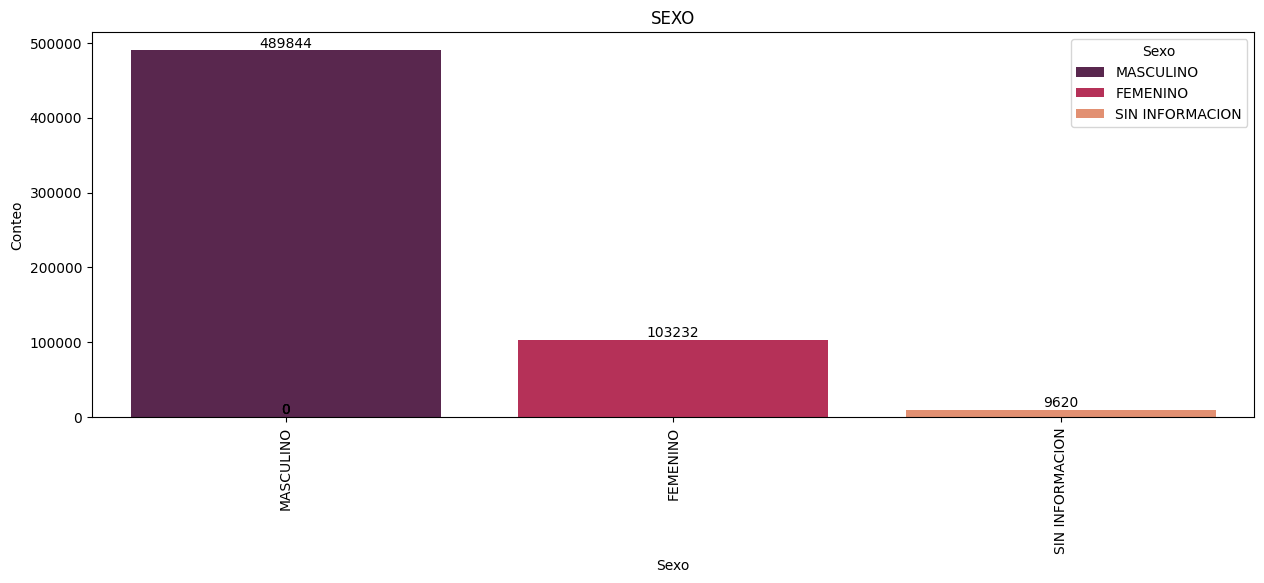

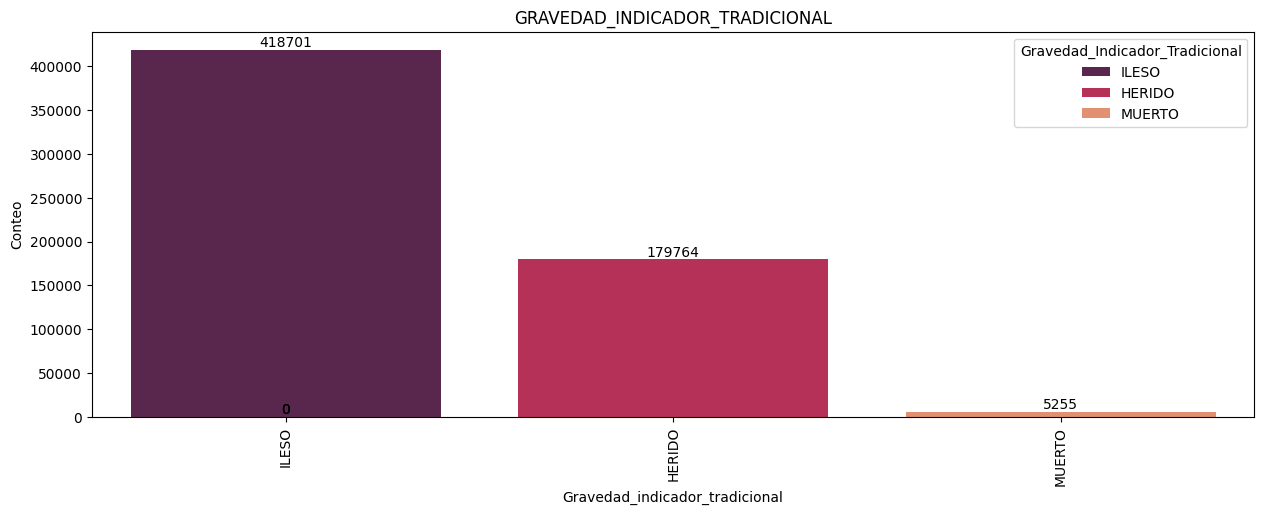

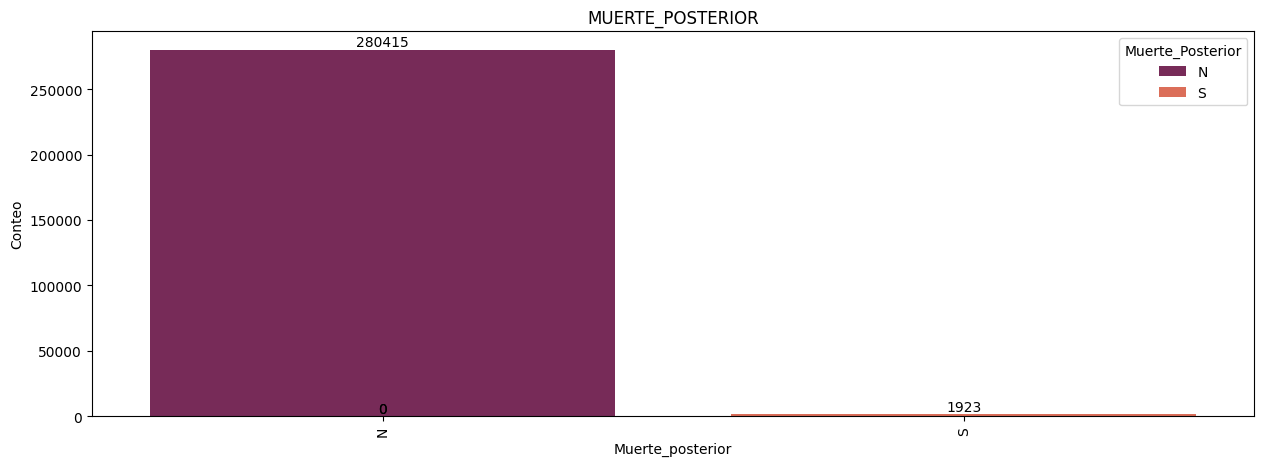

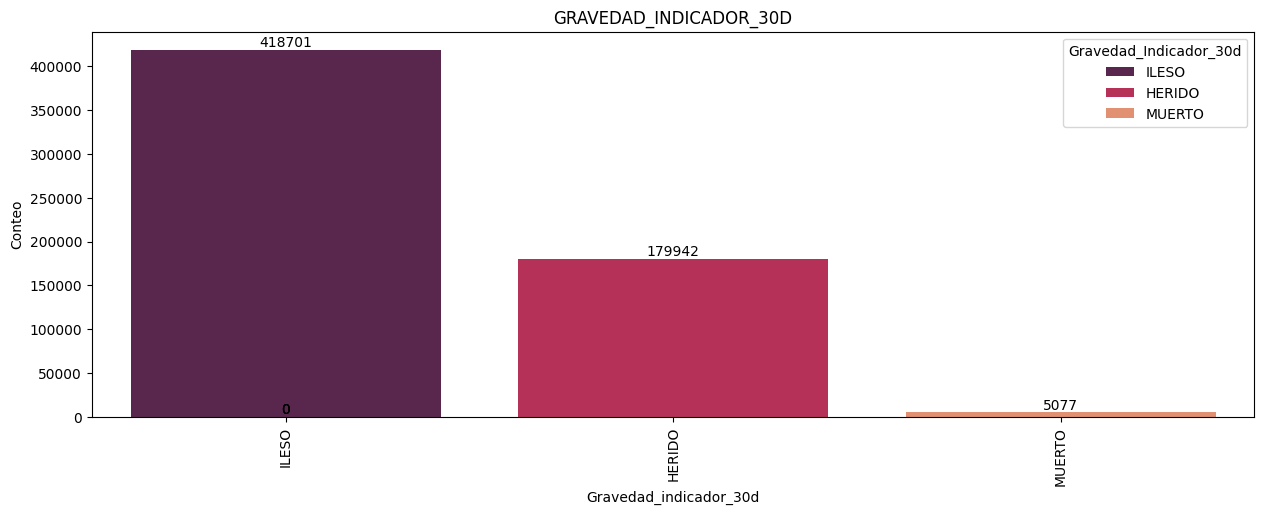

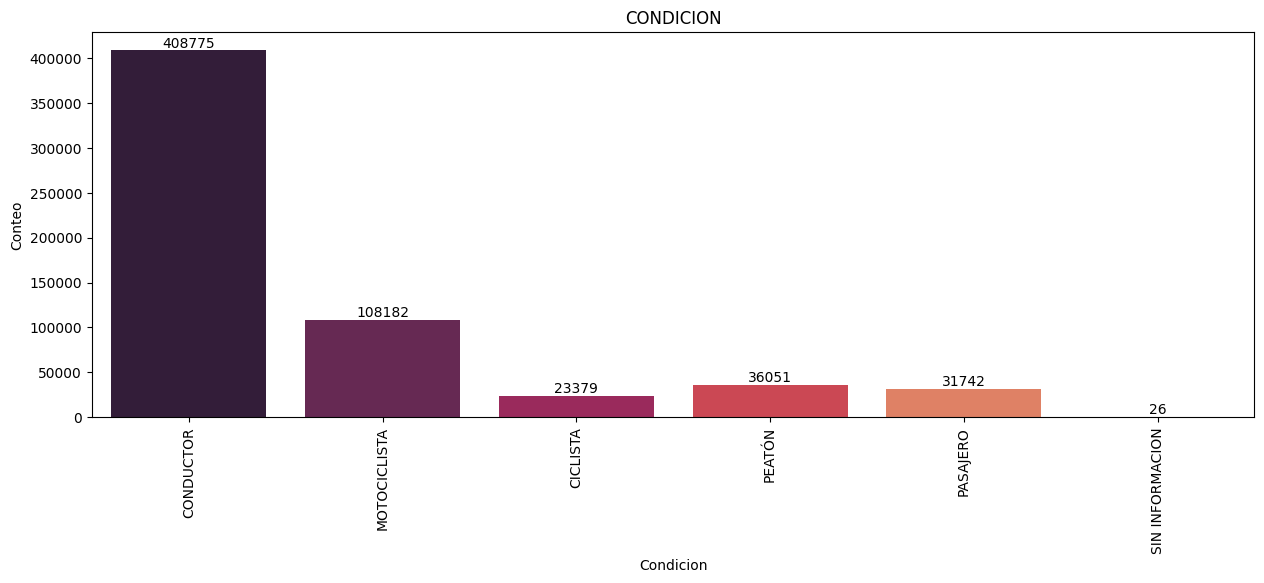

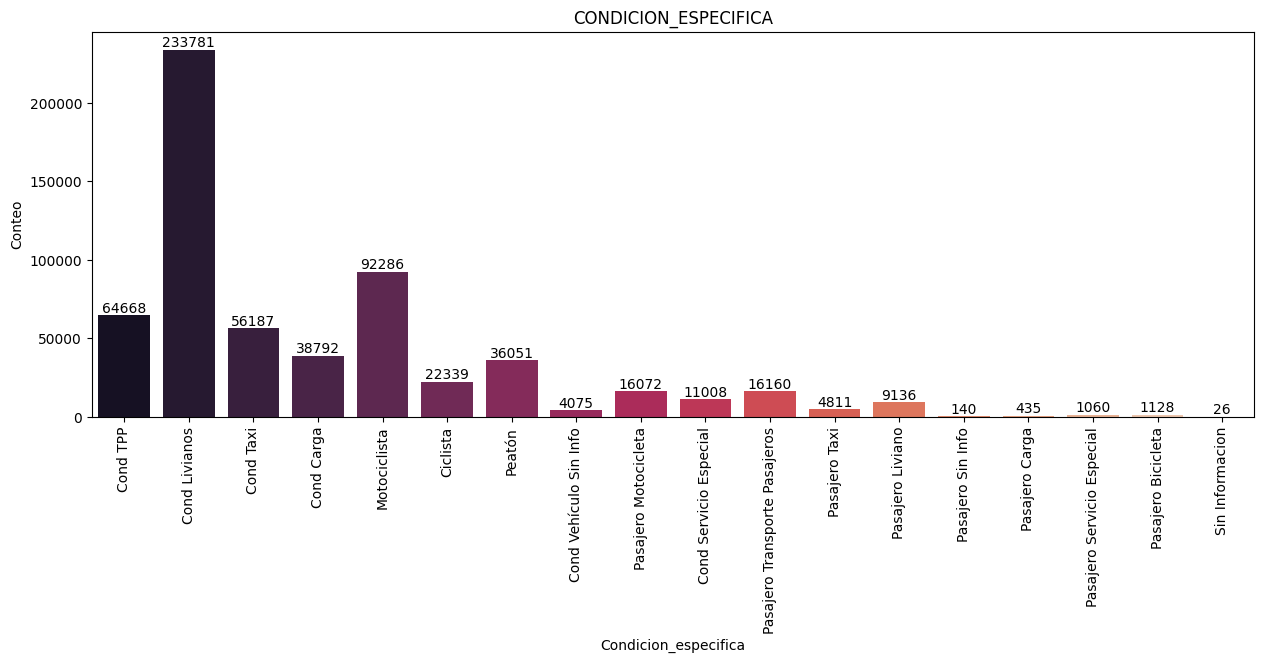

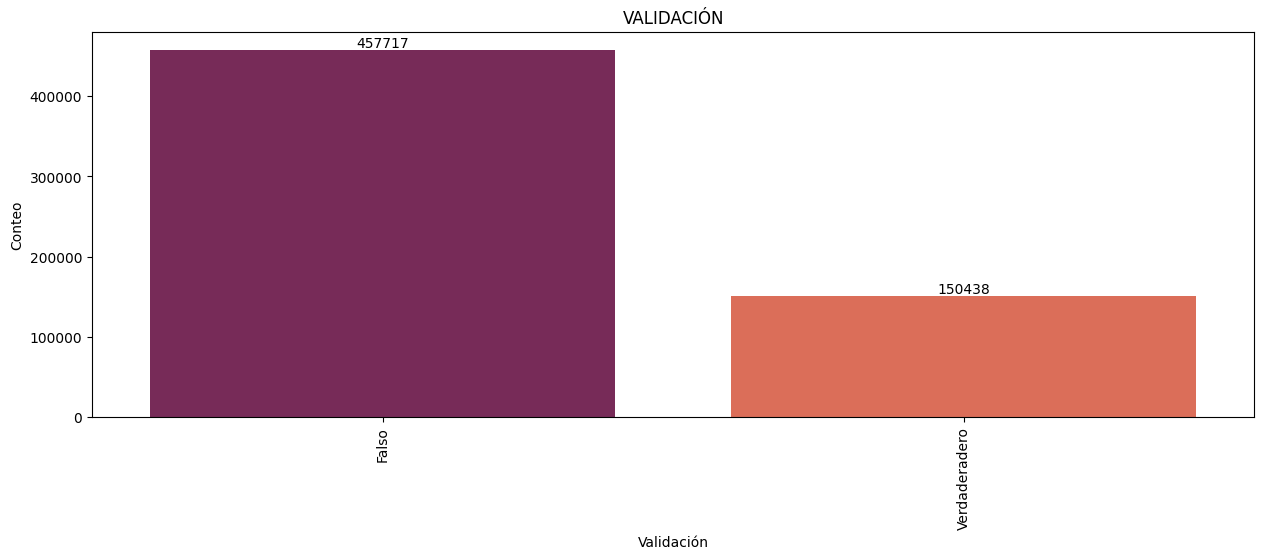

In [36]:
###
# 5. Graficas categóricas iniciales de verificación
###

print("\n=== Datos Categoícos de Vehiculos===")
for col in cols_categoricos_vehiculos:
  plt.figure(figsize=(15, 5))
  ax = sns.countplot(x=col, data=df_vehiculos, hue=col, palette='rocket')
  plt.title(col.upper())
  plt.xlabel(col.capitalize())
  plt.ylabel('Conteo')
  plt.xticks(rotation=90)
  for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+(p.get_width()/2), p.get_height()), ha='center', va='bottom')
  plt.show()

print("\n=== Datos Categoícos de Actor_vial===")
for col in cols_categoricos_actor_vial:
  plt.figure(figsize=(15, 5))
  ax = sns.countplot(x=col, data=df_actor_vial, hue=col, palette='rocket')
  plt.title(col.upper())
  plt.xlabel(col.capitalize())
  plt.ylabel('Conteo')
  plt.xticks(rotation=90)
  for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+(p.get_width()/2), p.get_height()), ha='center', va='bottom')
  plt.show()


=== Datos Categoícos de Vehiculos===


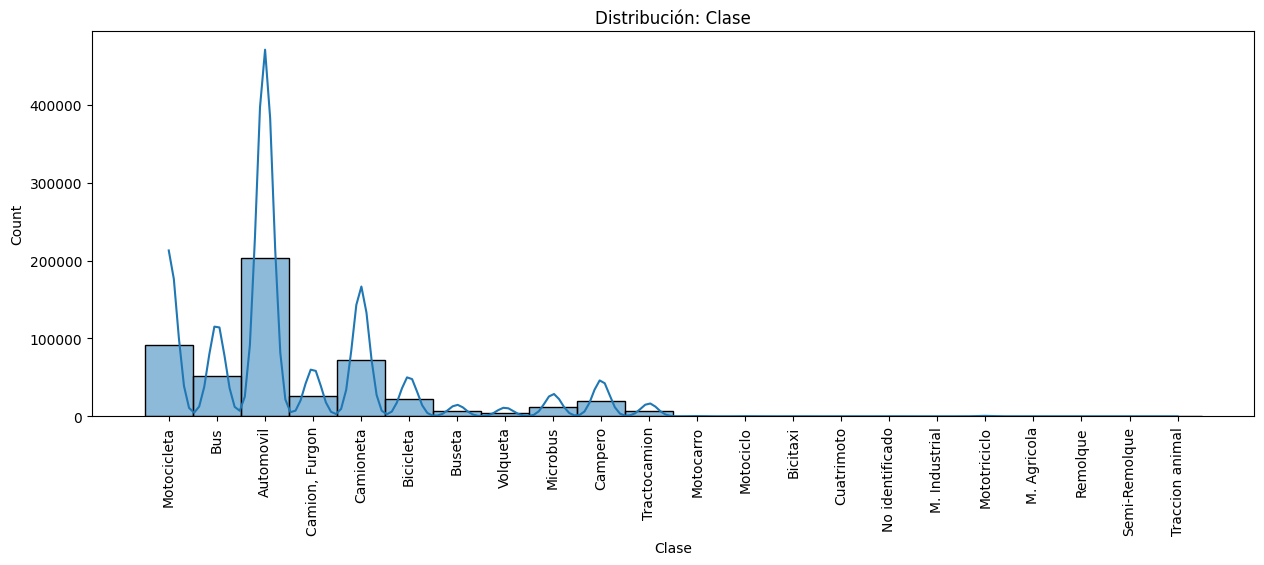

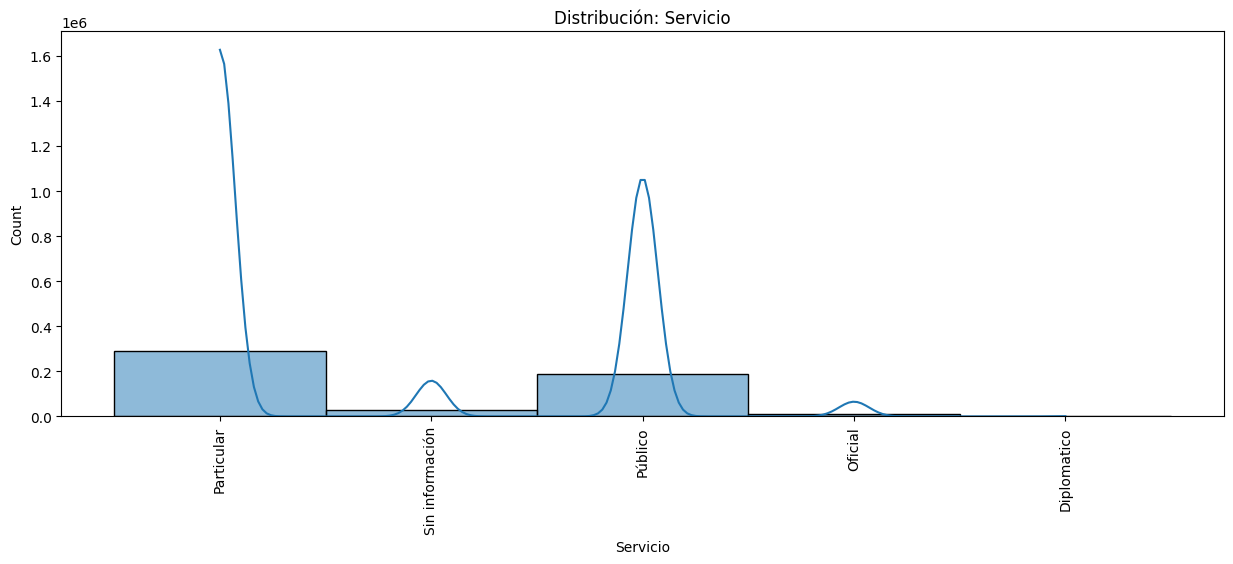

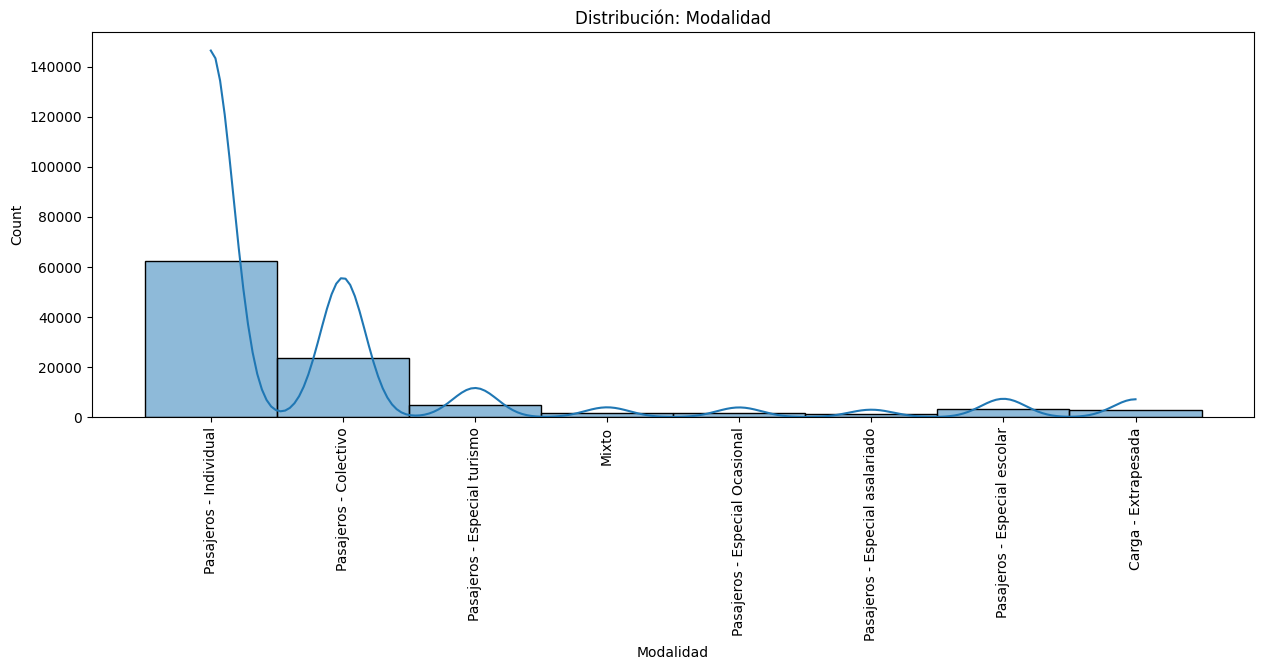

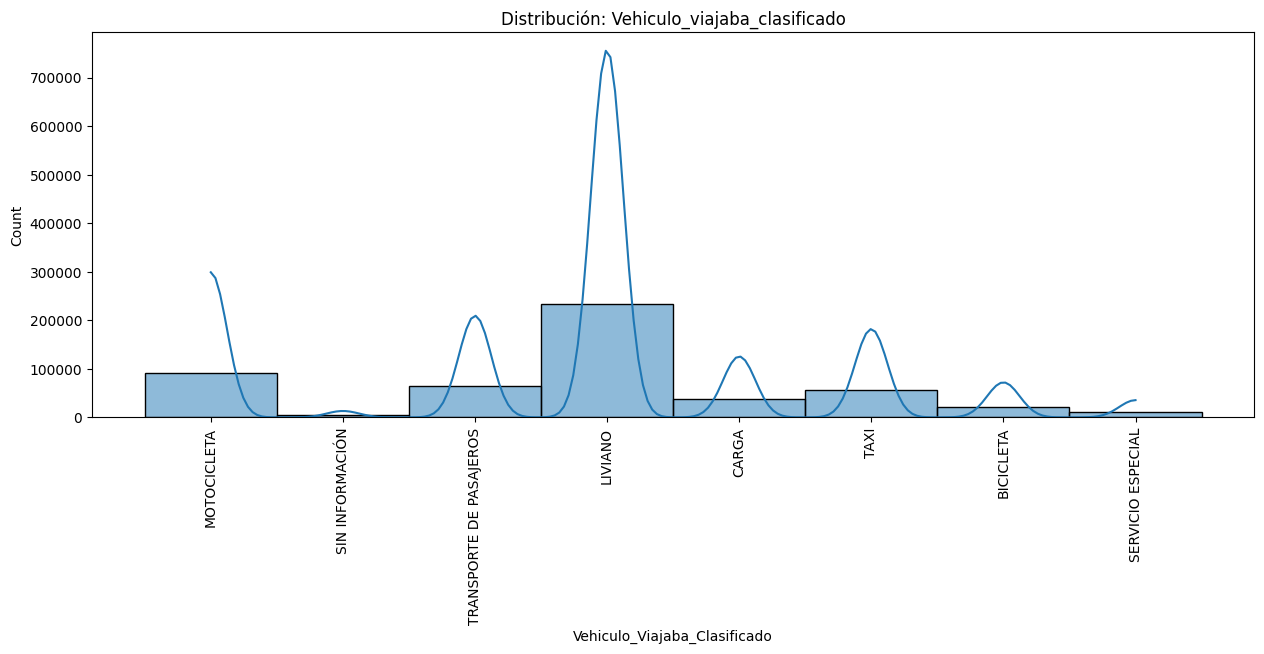

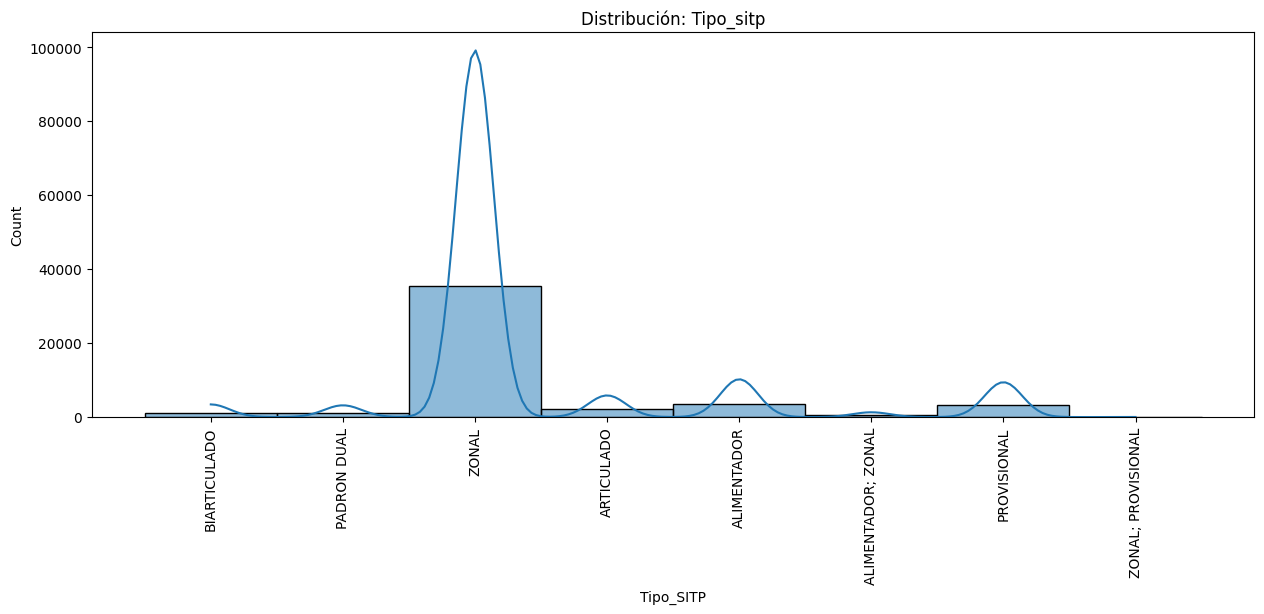


=== Datos Categoícos de Actor_vial===


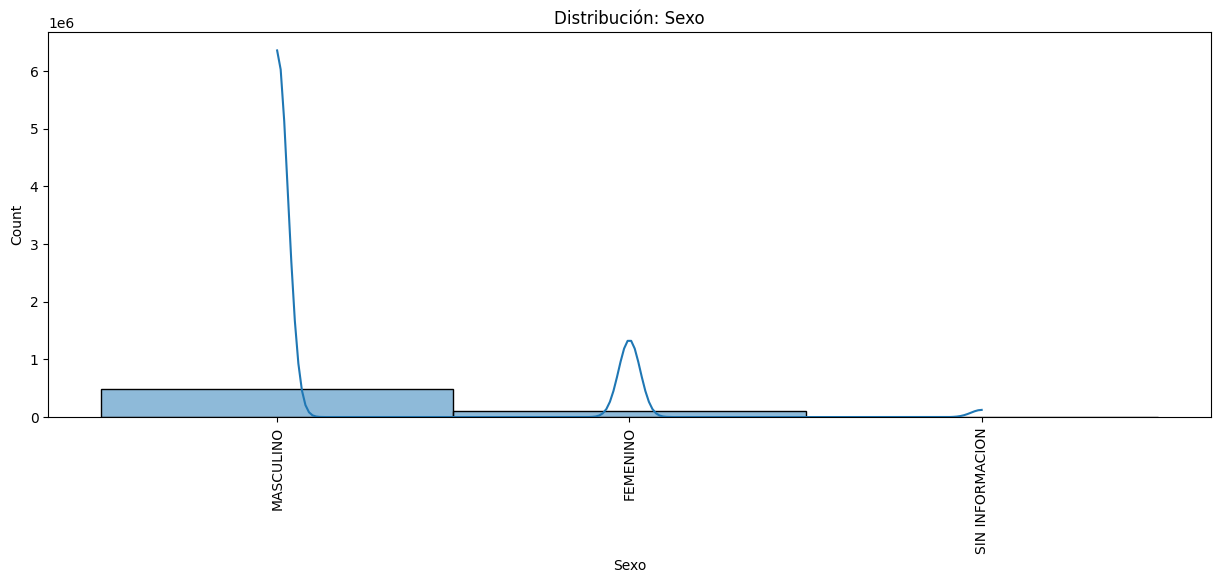

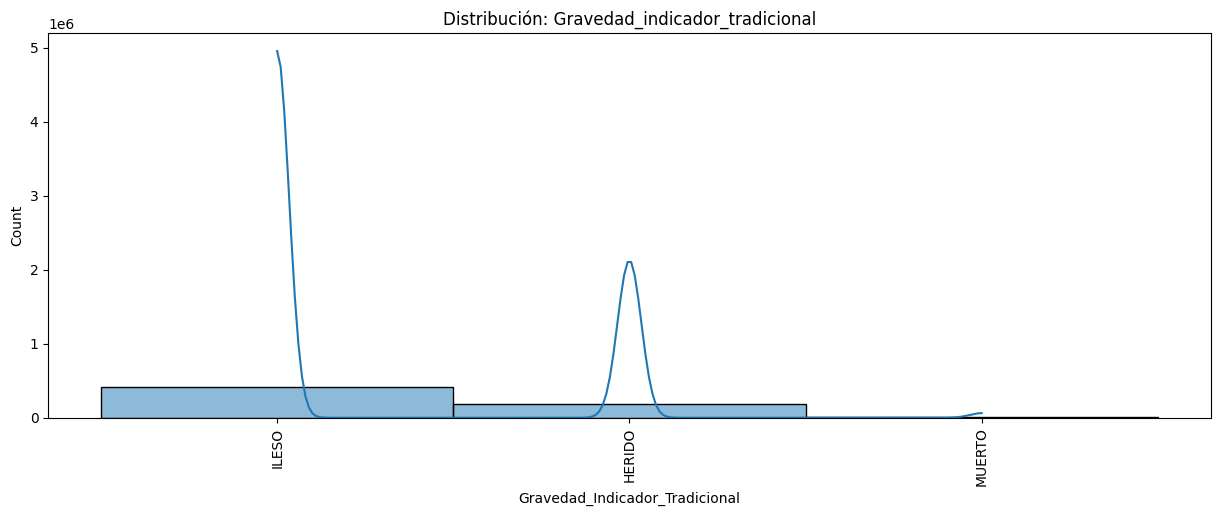

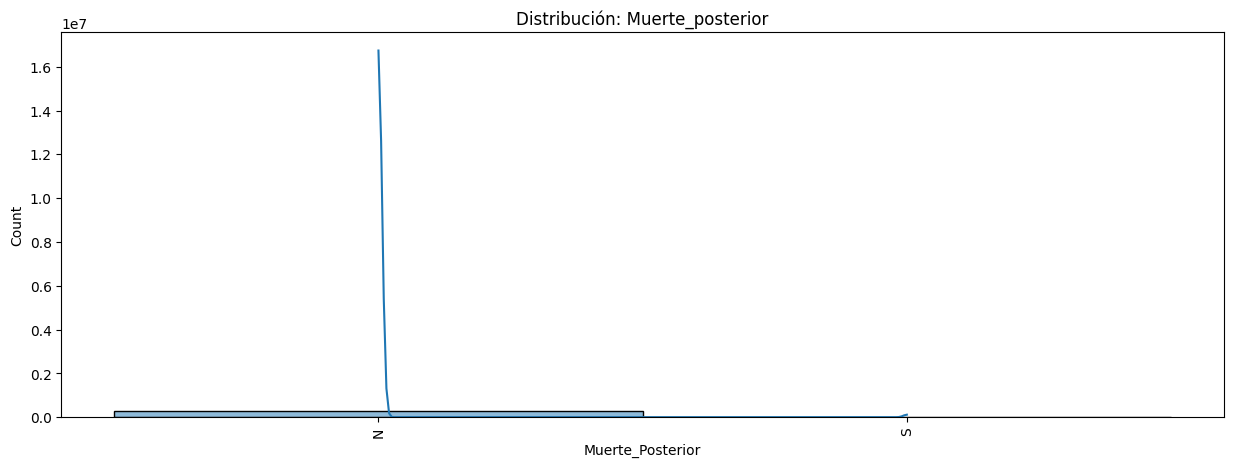

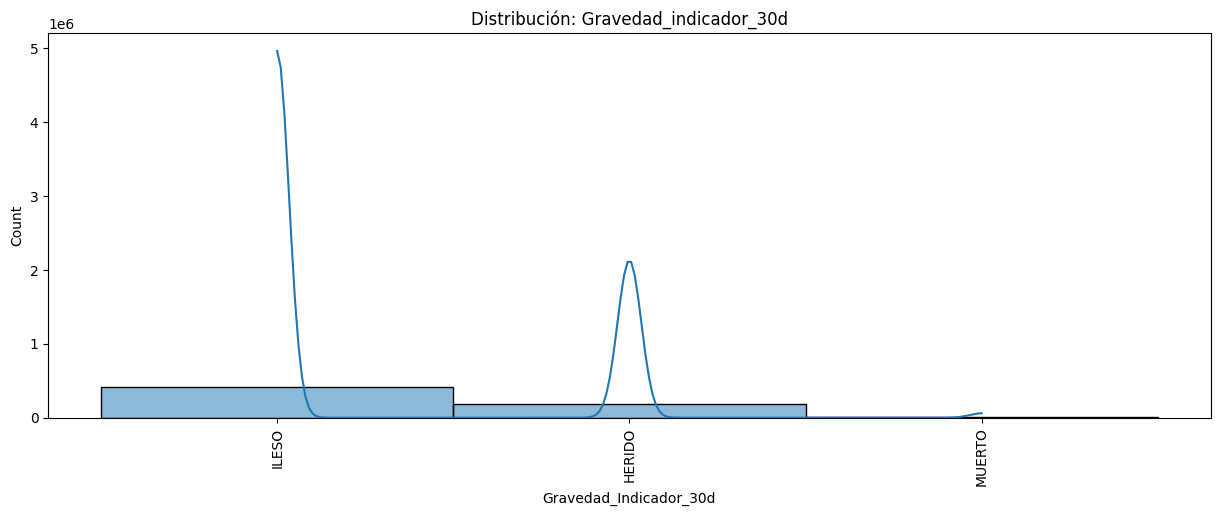

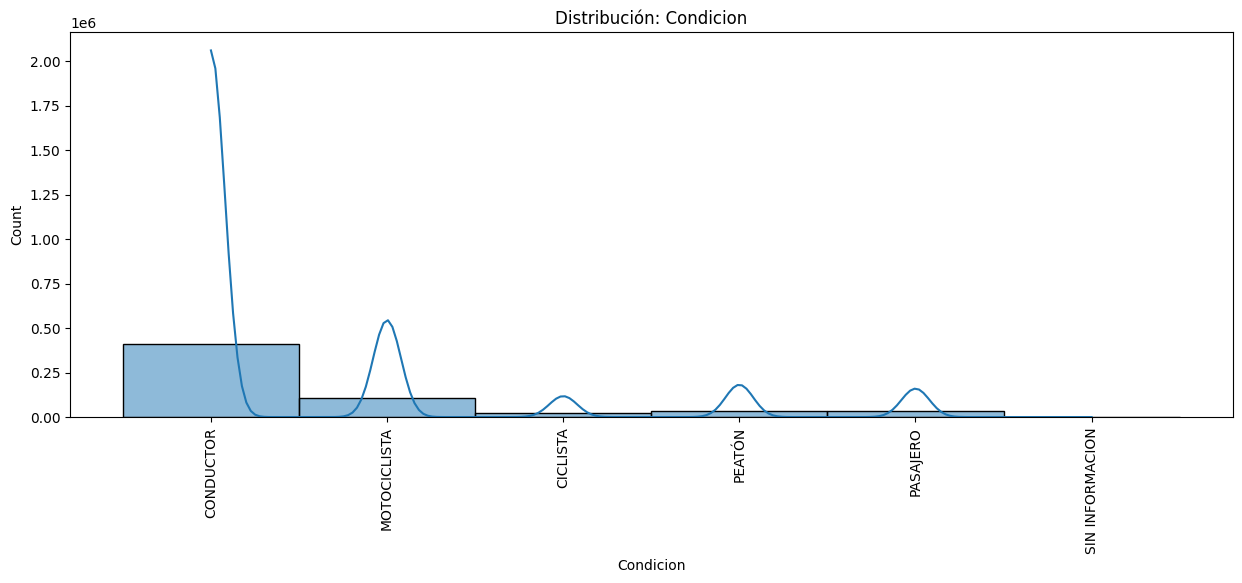

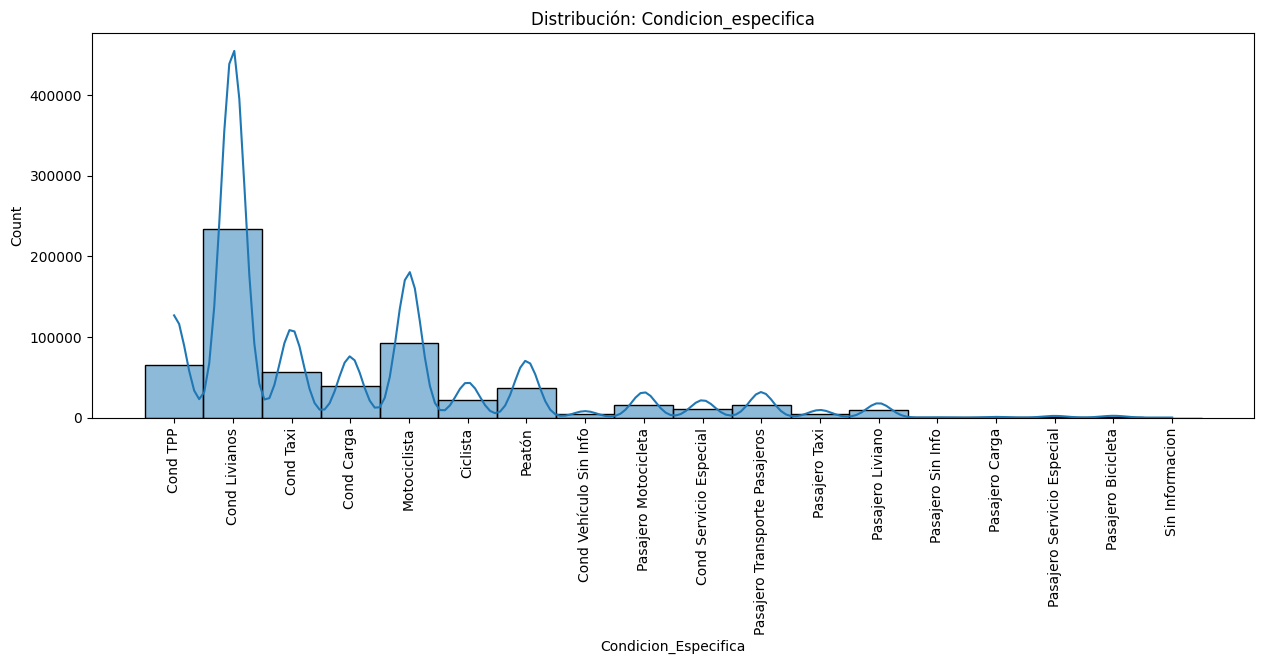

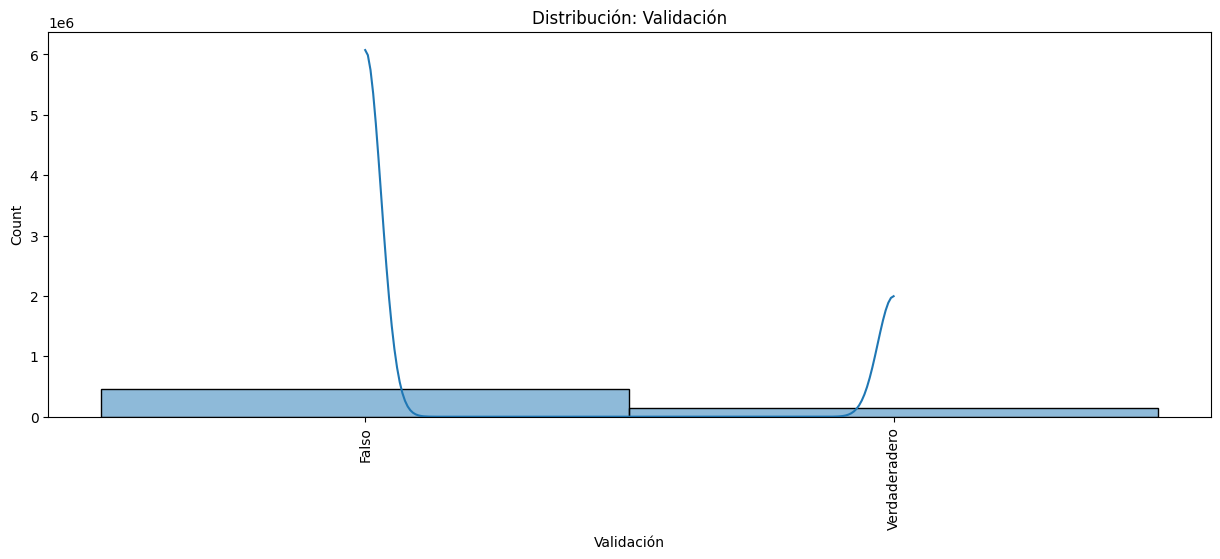

In [41]:
###
# 6. Graficas de distribución inicial de verificacion
###

print("\n=== Datos Categoícos de Vehiculos===")
for col in cols_categoricos_vehiculos:
  plt.figure(figsize=(15, 5))
  sns.histplot(x=col, data=df_vehiculos, kde=True)        # kde Genera una curva que sigue la distribución
  plt.title(f'Distribución: {col.capitalize()}')
  plt.xticks(rotation=90)
  plt.show()

print("\n=== Datos Categoícos de Actor_vial===")
for col in cols_categoricos_actor_vial:
  plt.figure(figsize=(15, 5))
  sns.histplot(x=col, data=df_actor_vial, kde=True)        # kde Genera una curva que sigue la distribución
  plt.title(f'Distribución: {col.capitalize()}')
  plt.xticks(rotation=90)
  plt.show()

=== Datos numéricos Vehiculos ===


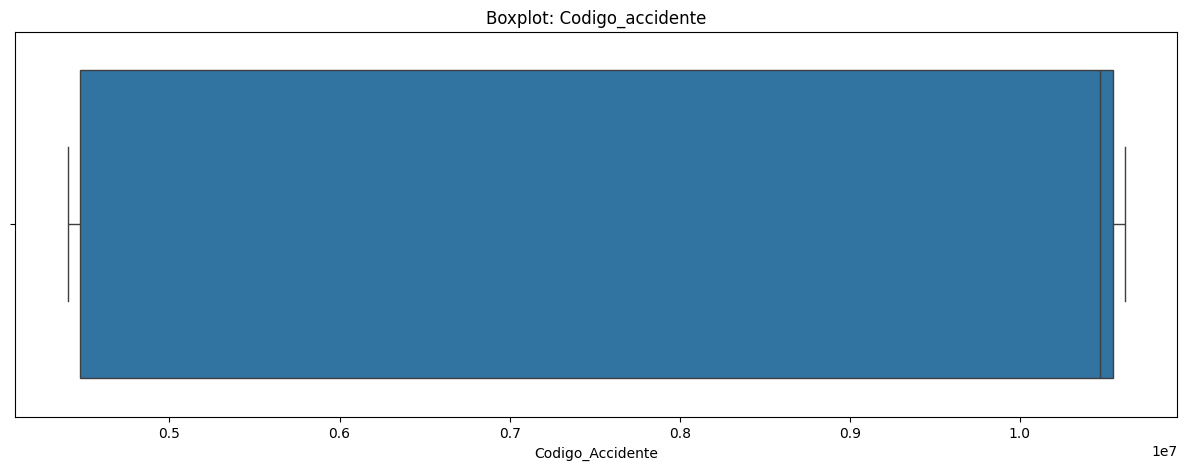


=== Datos numérocos Actor_vial


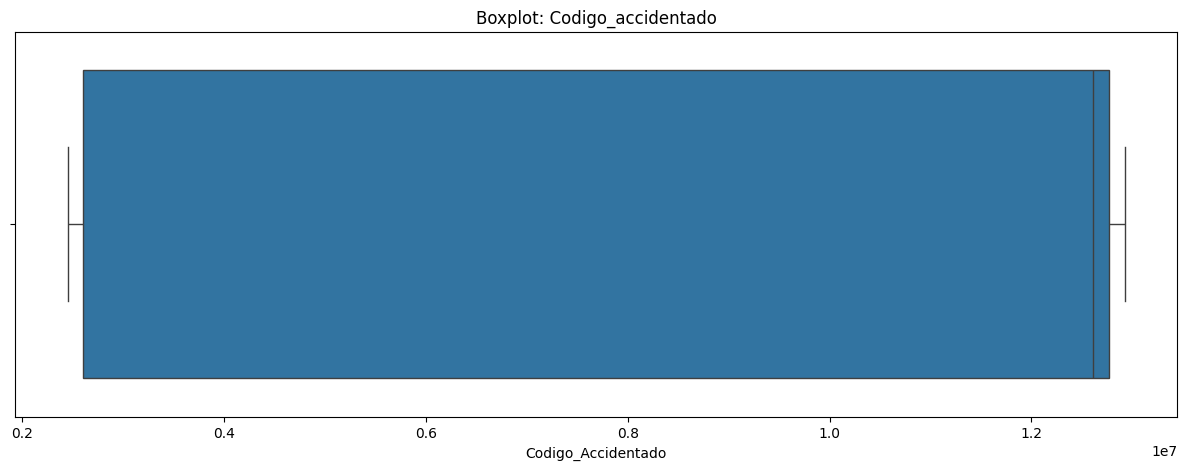

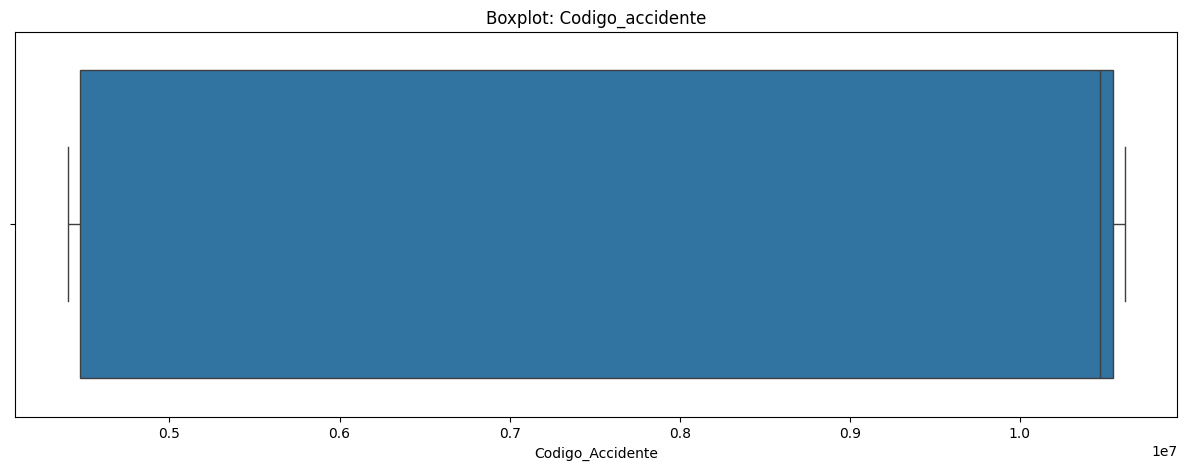

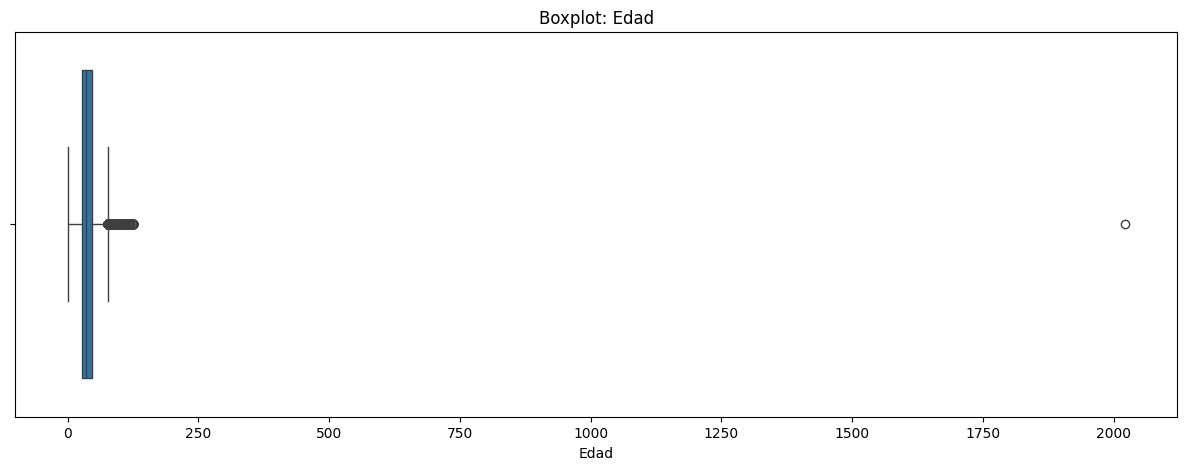

In [ ]:
###
# 7. Graficas de Boxplot
###

print('=== Datos numéricos Vehiculos ===')
for col in cols_numericos_vehiculos:
  plt.figure(figsize=(15, 5))
  sns.boxplot(x=col, data=df_actor_vial)        # kde Genera una curva que sigue la distribución
  plt.title(f'Boxplot: {col.capitalize()}')
  plt.show()

print('\n=== Datos numérocos Actor_vial')
for col in cols_numericos_actor_vial:
  plt.figure(figsize=(15, 5))
  sns.boxplot(x=col, data=df_actor_vial)        # kde Genera una curva que sigue la distribución
  plt.title(f'Boxplot: {col.capitalize()}')
  plt.show()